# A face Detection Pipeline 

This chapter has explored a number of the central concepts and algorithms of machine learning. But moving from these concepts to real-world application can be a challenge. Real-world datasets are noisy and heterogeneous, may have missing features, and data may be in a form that is difficult to map to a clean `[n_samples, n_features]` matrix. Before applying any of the methods discussed here, you must first extract these features from your data: there is no formula for how to do this that applies across all domains, and thus this is where you as a data scientist must exercise your own intuition and expertise.

One interesting and compelling application of machine learning is to iamges, and we have already seen a few examples of this where pixel-level features are used for classification. In the real world, data is rarely so uniform and simple pixels will not be suitable: this has lead to a large literatur on *feature extraction* methods for image data.

In this section, we will take a look at one such feature extraction technique, [Histogram of Oriented Gradients](https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients)(HOG), which transforms image pixels into a vector representation that is sensitive to broadly informative image features regardless of confounding factors like illumination. We will use these features to develp a simple face detection pipeline, using machine learning algorithms and concepts we've seen throughout this chapter.

We begin with the standard imports:

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import numpy as np 

## HOG Features

The Histogram of Gradients is a straightforward feature extraction procedure that was developed in the context of identifying pedestrian within images. HOG involves the following steps:

1. Optionally pre-normalize images. This leads to features that resist dependence on variations in illumination.

2. Convolve the image with two filters that are sensitive to horizontal and vertical brightness gradients. These capture edge, contour, and texture information.

3. Subdivide the image into cells of a predetermined size, and compute a histogram of the gradient orientations within each cell.

4. Normalize the histograms in each cell by comparing to the block of neighboring cells. This further suppresses the effect of illuminatino across the iamge.

5. Construct a one-dimensional feature vector from the information in each cell.

As fast HOG extractor is built into the Scikit-Image project, and we can try it out relatively quickly and visualize the oriented gradients within each cell:

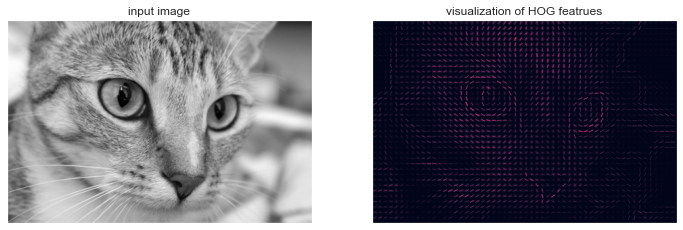

In [4]:
from skimage import data, color, feature 
import skimage.data

image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG featrues');